# 모델 성능 평가지표(Metric)
- 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정 하는 것
- 모델 평가 목적
    - Over Fitting 을 방지하고 최적의 모델을 찾기 위해서...

# 회귀 문제 성능측정

## 사이킷런에서 제공해주는 데이터셋
- 당뇨병 진행도를 예측하는 데이터셋

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data, diabetes.target

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [2]:
data = diabetes.data
target = diabetes.target
data.shape , target.shape

((442, 10), (442,))

In [3]:
data.min(), data.max() ,target.min(), target.max()

(-0.137767225690012, 0.198787989657293, 25.0, 346.0)

## 학습셋과 검증셋 분리

In [4]:
SEED = 42

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_valid , y_train, y_valid = train_test_split(data,target,random_state=SEED)

x_train.shape, x_valid.shape , y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

## Linear Regression 모델을 이용한 학습 및 예측

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_valid)
pred

array([137.94979889, 182.53621462, 129.85554049, 292.55738727,
       124.86559124,  89.73987275, 255.96040544, 177.64691719,
        87.88678516, 107.93733249,  93.26418526, 171.11859131,
        56.06450108, 207.22092723,  99.79206335, 131.71477524,
       215.86564416, 252.18825848, 201.56370519, 220.38853067,
       204.35710556,  88.90708813,  68.53068596, 190.02202826,
       153.9129781 , 164.02499711, 192.83524491, 187.16510251,
        46.60505083, 109.31176844, 175.05178809,  87.8091125 ,
       130.37787111, 186.56591449, 172.474085  , 188.61455112,
       124.0734688 , 119.16492145, 147.74614571,  59.27160039,
        70.90301607, 109.30498566, 170.97369589, 156.56765896,
       168.68372176,  61.54562801,  71.19297293, 111.94403965,
        54.31821851, 165.81456881, 152.78238871,  63.80826526,
       110.07732165, 108.6406539 , 179.16116053, 156.79589523,
        93.28778814, 212.92031906, 119.28369688,  70.70909587,
       186.68094494, 205.65924203, 140.02745143, 106.54

## 회귀 평가 지표

### MSE(Mean Squared Error)
- 실제값과 예측값의 차이를 제곱한뒤 평균화
- 이상치 민감
- 직관적이지 못하다.
- 손실함수로 주로 사용한다.
$$
MSE = \frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}
$$

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid,pred)
mse

2848.2953079329445

### RMSE(Root Mean Squared Error)
- MSE에 루트
- 이상치 민감
$$
RMSE = \sqrt{\frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}}
$$

In [8]:
import numpy as np
np.sqrt(mse)

53.36942296795932

### MAE(Mean Absolute Error)
- 실제값과 예측값의 차이를 절대값으로 변환해서 평균화
$$
MAE = \frac{1}{n}{\sum_{i=1}^{n}|y_i-\hat{y}_i|}
$$

In [9]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid,pred)
mae

41.548363283252066

### MAPE(Mean Absolute Percentage Error)
- 실제값에 대한 절대오차 비율의 평균을 퍼센트로 표현
$$
MAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{y_i}}
$$

In [10]:
def mape(true,pred):
    return np.mean(np.abs((true - pred) / true))
mape(y_valid,pred)

0.3731095161631557

### SMAPE(Symmetric Mean Absolute Percentage Error)
- 기존 MAPE의 단점 보완
- MAPE와 다른점은 각 실제값과 예측값을 절대값으로 변경후 합으로 나눈다.
- MAPE와 다르게 실제값에 0이 존재해도 계산이 가능하다.
- 과소추정에 대한 패널티를 줄수가 있다.
$$
SMAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{{|y_i|}+|\hat{y_i}|}}
$$

In [11]:
def smape(true,pred):
    error = np.abs(true-pred) / (np.abs(true) + np.abs(pred))
    return np.mean(error)
smape(y_valid,pred)

0.15271360402048711

# 분류문제 성능 측정

## 사이킷런에서 제공해주는 데이터셋
- 0~9 손글씨 이미지 받아오기

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()

- 8 x 8 크기의 이미지가 Flatten 되어있다.

In [13]:
digits.data.shape

(1797, 64)

In [14]:
digits.target[:4]

array([0, 1, 2, 3])

In [15]:
import matplotlib.pyplot as plt

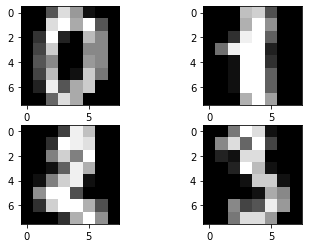

In [16]:
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(digits.data[0].reshape(8,8),cmap="gray")
ax[0,1].imshow(digits.data[1].reshape(8,8),cmap="gray")
ax[1,0].imshow(digits.data[2].reshape(8,8),cmap="gray")
ax[1,1].imshow(digits.data[3].reshape(8,8),cmap="gray")
plt.show()

- 3을 맞추는 문제로 재정의

In [17]:
data = digits.data
target = (digits.target == 3).astype(int)

In [18]:
target.mean()

0.1018363939899833

## 학습셋과 검증셋 분리

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(data,target,random_state=SEED)
x_train.shape , x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [20]:
y_train.mean() , y_valid.mean()

(0.10170749814402376, 0.10222222222222223)

## 혼동행렬(Confusion Matrix)
- 이진 분류에서 성능지표로 활용되는 행렬
- 이진 분류에서 예측 오류가 어느정도 되는지와 어떠한 유형의 예측 오류가 발생하는지를 나타내는 지표
- Precision(정밀도)
    - 양성으로 예측한 값들 중에 맞춘 비율
- Recall(재현율)
    - TPR
    - 실제 양성값들 중에 맞춘 비율
- FPR
    - 실제 음성값들 중에 못 맞춘 비율

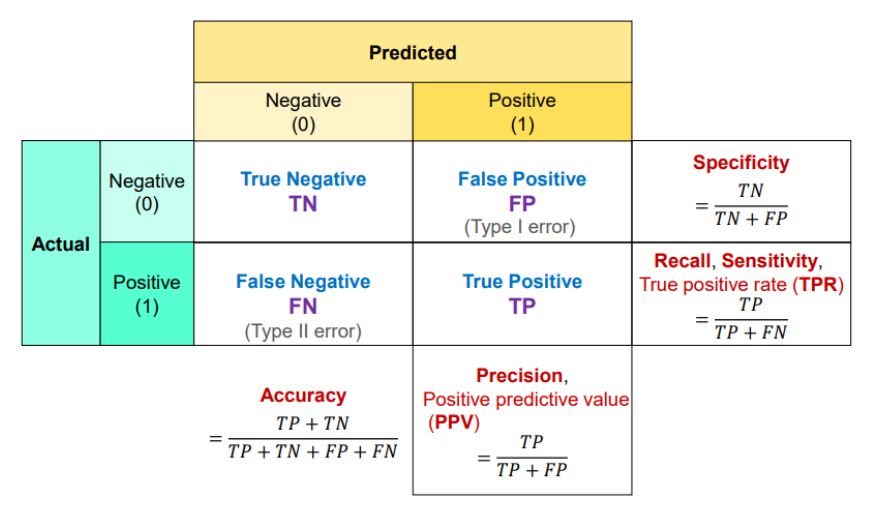

## 임계값(thresholds)
- 모델은 분류에서 확률(0~1) 또는 음수에서 양수사이에 실수를 예측값으로 출력
- 사이킷런에서는 `predict_proba` , `decision_function` 메소드를 제공
- `predict_proba` : 0.5 이상이면 1로 예측
- `decision_function` : 0 이상이면 1로 예측

## Accuracy 의 한계
- 오류중에서 FN 오류를 줄이는 것이 더 중요한 경우
- 오류 중에 FP 오류를 줄이는 것이 더 중요한 경우
- 정확도는 위에 두가지 오류에 정도의 차이를 구분할수 없기 때문에 적절한 성능지표가 될수 없다.
- 음성(0)이 양성(1)보다 훨씬 많은경우 음성(0)으로만 예측해도 높은 정확도를 보이기 때문에 적절한 성능지표가 될수없다.

- Dummy

In [21]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
pred_dummy = dummy.predict(x_valid)

- Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3,random_state=SEED)
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_valid)

- 정확도 평가

In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_valid,pred_dummy)
print(f"dummy: {score}")
score = accuracy_score(y_valid,pred_tree)
print(f"tree: {score}")

dummy: 0.8977777777777778
tree: 0.9688888888888889


- Confusion Matrix 그리기

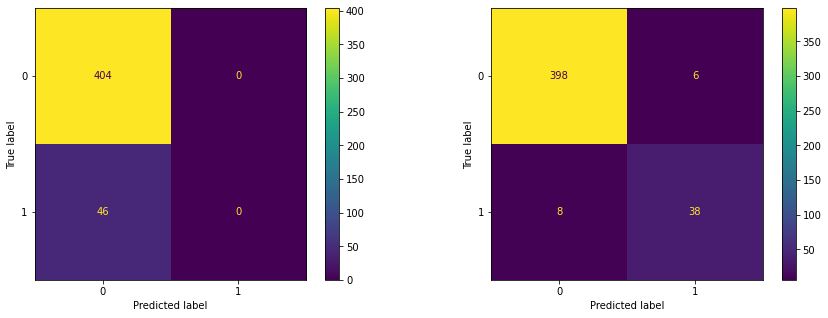

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_valid,pred_dummy) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

cm = confusion_matrix(y_valid,pred_tree) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[1])
plt.show()

## Precision vs Recall
- FP 줄이는것이 목표일때 Precision 사용
- FN 줄이는것이 목표일때 Recall 사용

In [25]:
from sklearn.metrics import precision_score , recall_score

precision_score(y_valid,pred_dummy)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [26]:
recall_score(y_valid,pred_dummy)

0.0

In [27]:
precision_score(y_valid,pred_tree) , recall_score(y_valid,pred_tree)

(0.8636363636363636, 0.8260869565217391)

### Precision-Recall Trade-off

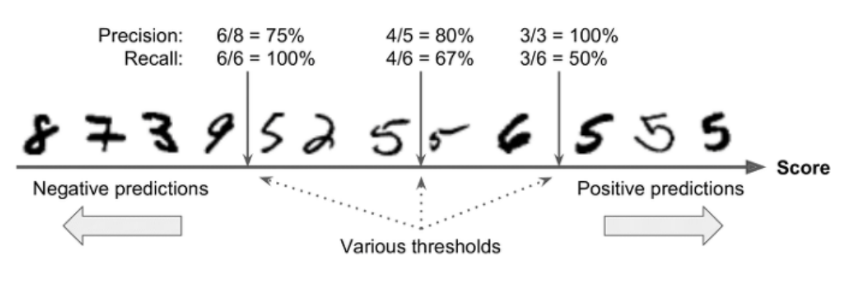

In [28]:
pred_proba = tree.predict_proba(x_valid)[:,1]

In [29]:
threshold = 0.9
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.9024390243902439, 0.8043478260869565)

In [30]:
threshold = 0.1
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.6268656716417911, 0.9130434782608695)

## F1-score
- Precision 과 Recall의 조화평균
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않았을때 높은 점수가 나온다.
- Precision 과 Recall은 Trade-off 관계이기 때문에, 이둘의 조화평균값인 F1-Score 를 많이 사용한다.
$$
F1 = 2*\frac{Precision*Recall}{Precision+Recall}
$$

- precision = 0.1 , recall = 0.9 가정!!

In [31]:
(0.1+0.9) / 2 # 산술 평균

0.5

In [32]:
2 * 0.1*0.9 / (0.1+0.9) # 조화평균

0.18000000000000002

In [33]:
from sklearn.metrics import f1_score
f1_score(y_valid,pred_dummy) , f1_score(y_valid,pred_tree)

(0.0, 0.8444444444444444)

- recall, precision, F1-score 한번에 보기

In [34]:
from sklearn.metrics import classification_report
print("##dummy##")
print(classification_report(y_valid,pred_dummy))
print("##tree##")
print(classification_report(y_valid,pred_tree))

##dummy##
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       404
           1       0.00      0.00      0.00        46

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450

##tree##
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       404
           1       0.86      0.83      0.84        46

    accuracy                           0.97       450
   macro avg       0.92      0.91      0.91       450
weighted avg       0.97      0.97      0.97       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC curve(Receiver Operating Characteristic curve)
- FPR를 X축으로 ,TPR을 Y축으로 해서 둘간의 관계를 표현한 그래프
    - FPR = FP / (FP+TN)
    - TPR = TP / (FN+TP)

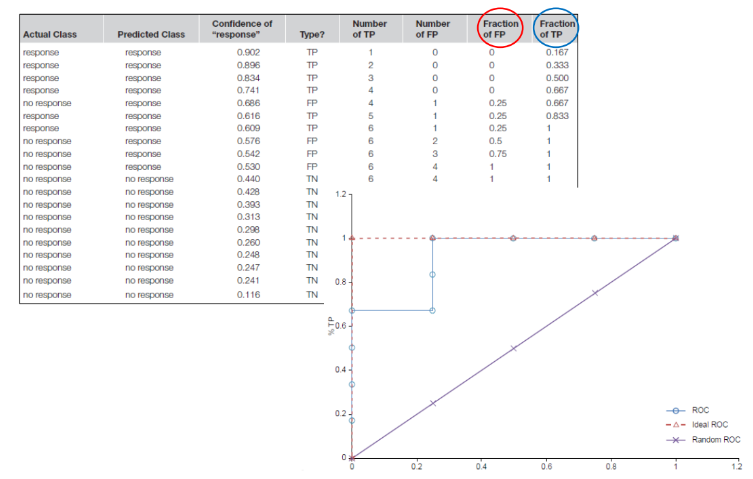

- ROC Curve

In [35]:
pred_dummy = dummy.predict_proba(x_valid)[:,1] # 1에 대한 확률만 가져오겠다.
pred_tree = tree.predict_proba(x_valid)[:,1]

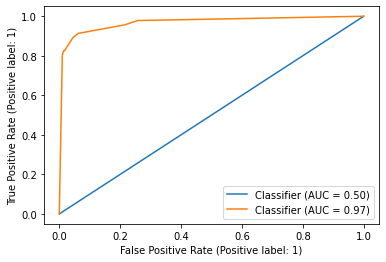

In [36]:
from sklearn.metrics import RocCurveDisplay
fig,ax = plt.subplots()
RocCurveDisplay.from_predictions(y_valid,pred_dummy,ax=ax)
RocCurveDisplay.from_predictions(y_valid,pred_tree,ax=ax)
plt.show()

## AUROC(ROC AUC) 
- ROC Curve의 밑부분 면적
- 넓을수록 모형 성능이 좋다.
- 임계값이 어떻게 선택되었는지와 무관하게 모델의 예측 품질을 측정 할수 있다.
- Poor model(0.5 ~ 0.7)
- Fair model(0.7 ~ 0.8)
- Good model(0.8 ~ 0.9)
- Excellent model(0.9 ~ 1.0)

## Multi classification 에서의 F1-score
- micro
    - 전체 클래스의 대하여 TP/FP/FN 구한뒤에 F1-score 계산
- macro
    - 각 클래스 대하여 F1-score 구한뒤 산술 평균
- weighted
    - 각 클래스의 대하여 F1-score 구한뒤 각 클래스가 차지하는 비율에 따라 가중평균

In [38]:
digits = load_digits()

data = digits.data
target = digits.target

x_train,x_valid,y_train,y_valid = train_test_split(data,target,random_state=SEED)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [40]:
np.unique(y_train) , np.unique(y_valid)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [41]:
tree = DecisionTreeClassifier(max_depth = 5 , random_state=SEED)
tree.fit(x_train,y_train)
pred = tree.predict(x_valid)
pred

array([6, 9, 3, 2, 8, 8, 1, 3, 5, 7, 2, 1, 4, 0, 4, 2, 3, 4, 8, 8, 4, 3,
       9, 7, 8, 6, 3, 8, 6, 3, 4, 9, 3, 4, 4, 6, 9, 4, 7, 6, 6, 3, 1, 3,
       6, 8, 3, 0, 2, 9, 9, 8, 9, 1, 6, 0, 9, 0, 0, 2, 5, 4, 9, 2, 1, 9,
       7, 0, 7, 9, 9, 9, 5, 9, 7, 0, 4, 1, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 3, 8, 2, 8, 3, 9, 2, 9, 4, 4, 7, 4, 3, 9, 3, 8, 1, 5, 1, 2, 2,
       2, 7, 4, 4, 1, 9, 2, 7, 6, 4, 2, 6, 9, 4, 0, 7, 5, 7, 8, 1, 7, 9,
       7, 9, 0, 6, 6, 4, 2, 1, 0, 9, 4, 6, 9, 9, 2, 9, 0, 9, 9, 6, 6, 0,
       6, 4, 9, 9, 3, 3, 7, 8, 9, 0, 4, 1, 8, 6, 2, 9, 9, 8, 4, 8, 8, 5,
       7, 7, 2, 2, 3, 9, 2, 0, 3, 8, 2, 9, 6, 9, 9, 1, 1, 6, 4, 8, 3, 6,
       1, 1, 9, 9, 9, 7, 8, 9, 4, 8, 8, 9, 2, 4, 9, 6, 1, 8, 6, 0, 1, 1,
       2, 7, 4, 6, 4, 5, 6, 4, 3, 8, 3, 6, 7, 9, 9, 8, 4, 7, 6, 1, 8, 9,
       8, 8, 4, 2, 8, 1, 9, 9, 7, 6, 2, 2, 2, 3, 4, 2, 8, 3, 6, 0, 5, 7,
       7, 0, 8, 0, 4, 9, 1, 8, 3, 6, 0, 4, 8, 0, 2, 3, 6, 5, 9, 7, 2, 4,
       9, 9, 9, 1, 5, 3, 3, 2, 0, 5, 9, 3, 4, 0, 2,

In [43]:
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.32      0.32      0.32        37
           2       0.56      0.66      0.60        38
           3       0.87      0.85      0.86        46
           4       0.80      0.78      0.79        55
           5       0.73      0.19      0.30        59
           6       0.95      0.89      0.92        45
           7       0.90      0.68      0.78        41
           8       0.37      0.61      0.46        38
           9       0.52      0.85      0.65        48

    accuracy                           0.67       450
   macro avg       0.70      0.67      0.66       450
weighted avg       0.71      0.67      0.66       450



In [45]:
f1_score(y_valid,pred,average="micro")

0.6688888888888889

In [46]:
f1_score(y_valid,pred,average="macro")

0.6620047429878985

In [47]:
f1_score(y_valid,pred,average="weighted")

0.6616398619763888

- 소프트맥스 함수(Softmax Function)
    - 각 클래스에 대한 확률을 출력
    - 입력받은 값들을 0~1사이의 값들로 모두 정규화하며 출력값들의 합은 항상 1이 되는 특성을 가진 함수

$$
softmax(z) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

In [51]:
tree.predict_proba(x_valid).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

- 음의 로그함수
    - 1을 넣으면 0이 나온다. 0에 가까운 값을 넣을수록 큰값이 나온다.

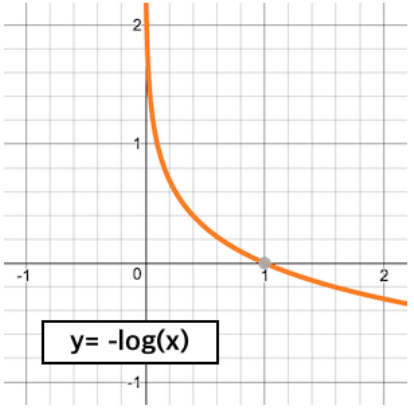

## Multi classification 에서의 logloss
- 모델이 예측한 확률 값을 반영해서 평가 한다.
- 0 에 가까울 수록 좋은 모델
- 정답에 해당하는 확률값들을 음의 로그함수에 넣어서 나온값들을 평균내서 평가!!

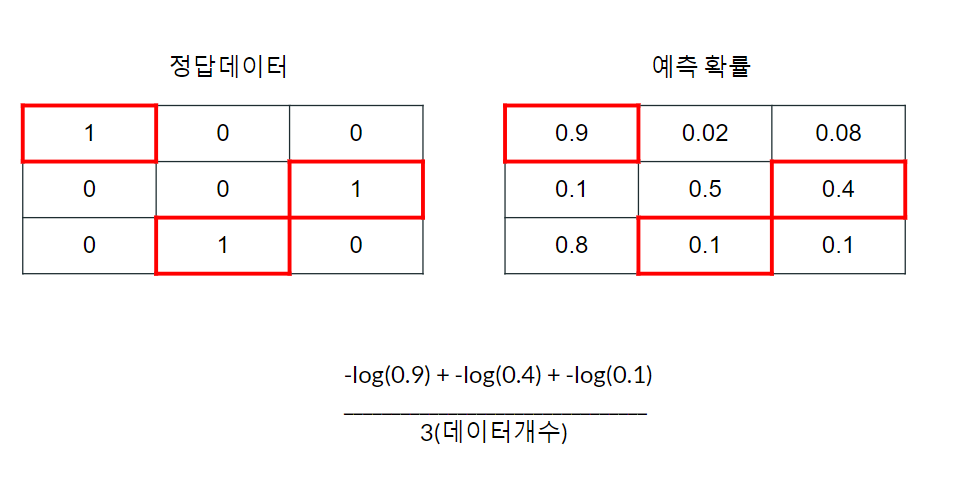

In [52]:
from sklearn.metrics import log_loss
pred = tree.predict_proba(x_valid)
pred

array([[0.        , 0.00819672, 0.        , ..., 0.        , 0.05737705,
        0.        ],
       [0.        , 0.13461538, 0.        , ..., 0.01923077, 0.03205128,
        0.42307692],
       [0.        , 0.04724409, 0.05511811, ..., 0.00787402, 0.02362205,
        0.03937008],
       ...,
       [0.        , 0.        , 0.73239437, ..., 0.13380282, 0.04225352,
        0.01408451],
       [0.        , 0.00819672, 0.        , ..., 0.        , 0.05737705,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
log_loss(y_valid,pred)

2.1078887104736785